# This is to provide the group with slope map and _create_mask function 
Version 1 By Zhuoran Duan @ 11/17/2016 14:00

In [3]:
%matplotlib inline

import os
import logging

from osgeo import gdal
import pygeoprocessing

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh')

import pandas as pd

dem_loc='dem_90m_pnnl-2.tif'
veg_loc='binary_veg_90m.tif'

dem = gdal.Open(dem_loc)
veg = gdal.Open(veg_loc)

dem_map=dem.ReadAsArray()
veg_map=veg.ReadAsArray()

In [4]:
OUTPUT_DIR = './output/'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [5]:
OUTPUT_DIR = './output/'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR);

slope_raster = os.path.join(OUTPUT_DIR, 'slope.tif')

pygeoprocessing.calculate_slope(
    dem_dataset_uri='dem_90m_pnnl-2.tif',
    slope_uri=slope_raster)

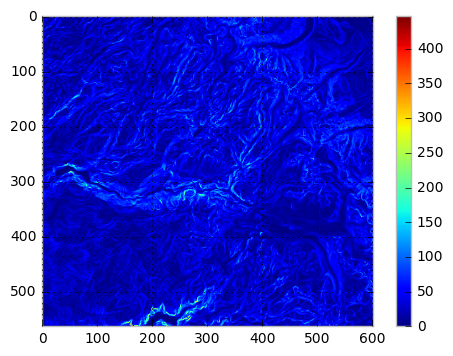

In [6]:
slope = gdal.Open(slope_raster)
slope_map=slope.ReadAsArray()

plt.imshow(slope_map)
plt.colorbar()

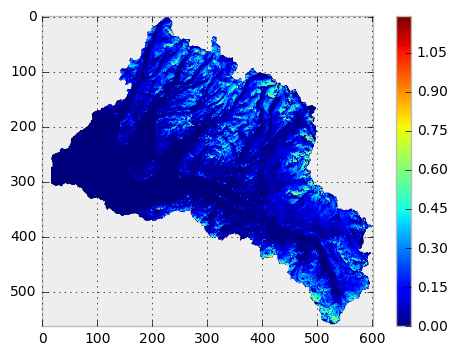

In [7]:
swe_loc='ASO_swe_day7.tif'
swe = gdal.Open(swe_loc)

swe_map=swe.ReadAsArray()

plt.imshow(swe_map)
plt.colorbar()

0...10...20...30...40...50...60...70...80...90...100 - done.


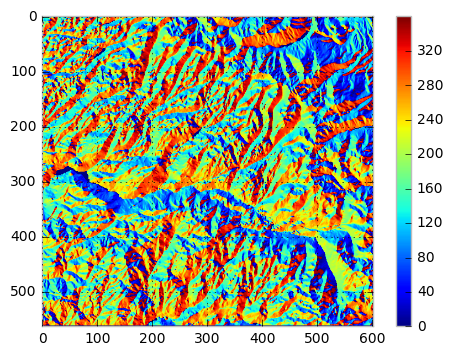

In [8]:
!gdaldem aspect 'dem_90m_pnnl-2.tif' 'aspect.tif' -trigonometric -zero_for_flat 

aspect_loc='aspect.tif'

aspect = gdal.Open(aspect_loc)


aspect_map=aspect.ReadAsArray()
plt.imshow(aspect_map)
plt.colorbar()

1454

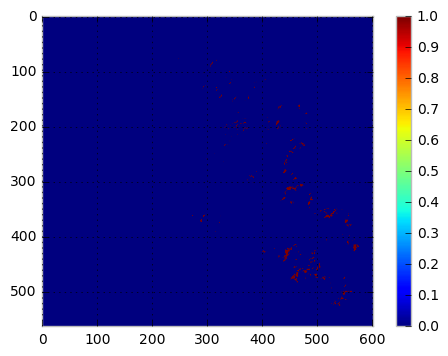

In [9]:
def _create_mask(swe_map, dem_map, slope_map, aspect_map,veg_map, swe_range, dem_range, slope_range, aspect_range, veg):
    # swe_map, dem_map, slope_map, veg_map, aspect_map : format - 2D-arrays
    # swe_range,elevation_range,slope_range, aspect_range: format [lower_boundary,upper_boundary]
    # veg should be1 for forested or 0 for non-forested

    # All blocks will be the same dimensions
    matching_pixels = (((swe_map > np.min(swe_range)) & (swe_map < np.max(swe_range))) &
                           ((dem_map > np.min(dem_range))& (dem_map < np.max(dem_range))) &
                           ((slope_map > np.min(slope_range)) & (slope_map < np.max(slope_range))) & 
                           ((aspect_map > np.min(aspect_range)) & (aspect_map < np.max(aspect_range))) & 
                           (veg_map == veg)) 
  
    out_nodata = -9999
    out_block = np.zeros((swe.RasterYSize,swe.RasterXSize))
    out_block =  matching_pixels 
    return out_block

mask1 = _create_mask(swe_map, dem_map, slope_map, aspect_map,veg_map,[0.1,1], [3000,4000], [0,500],[1,180], 1)
#_create_mask(swe_range,elevation_range,slope_range,forest_or_nonforest)
plt.imshow(mask1)
plt.colorbar()
mask1.sum()